# iii_alt_preprocessing: Alternative Preprocessing Strategies for the Dataset

## Computing SVD | All Features Included

In [53]:
ss = StandardScaler()
main_wfeats_scaled = ss.fit_transform(main_wfeats)
SVD = TruncatedSVD(200)
svd_matrix = SVD.fit_transform(main_wfeats_scaled)

##### Sanity Check for # of Components

In [54]:
svd_matrix.shape

(22891, 200)

### Examining the Explained Variance Ratio through each Component

Text(0,0.5,'variance ratio')

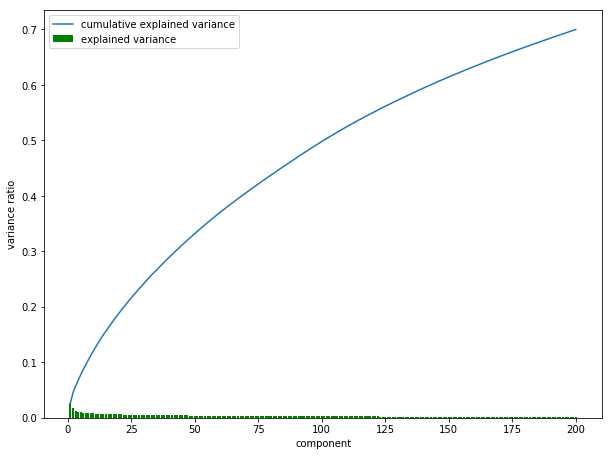

In [58]:
fig = plt.figure(figsize=(10,7.5))
plt.bar(np.array(range(200))+1, 
        SVD.explained_variance_ratio_, 
        color='g', 
        label='explained variance')
plt.plot(np.array(range(200))+1, 
         np.cumsum(SVD.explained_variance_ratio_), 
         label='cumulative explained variance')
plt.legend()
plt.xlabel('component')
plt.ylabel('variance ratio')

Looking deeper:

In [59]:
components_names = ["component_"+str(i+1) for i in range(200)]
svd_df = pd.DataFrame(svd_matrix,
                      columns=components_names)
svd_df.insert(0, 'song_id', main_wfeats.index)
svd_df.set_index('song_id', inplace=True)
svd_df.head()

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_191,component_192,component_193,component_194,component_195,component_196,component_197,component_198,component_199,component_200
song_id,,,,,,,,,,,,,,,,,,,,,
6SluaPiV04KOaRTOIScoff,0.757918,1.404843,-1.913337,-0.472958,0.268357,-1.371433,-1.119114,1.476517,0.979065,-1.521656,...,0.464068,-0.150609,-0.567713,0.125683,-0.669925,-0.052231,-0.472644,0.740681,-0.418329,-0.879269
5qEVq3ZEGr0Got441lueWS,-3.323133,1.920202,-5.114308,-0.452438,-2.890209,0.270954,-5.516297,2.154386,10.550974,2.574092,...,-0.227841,0.228148,-0.143249,0.192309,0.368959,-0.421887,-0.240747,-0.054668,0.599885,-0.305045
5kqIPrATaCc2LqxVWzQGbk,2.732880,-3.548657,-1.923609,-0.168638,0.085750,0.606177,-1.319362,0.284451,-0.691482,-0.654109,...,-3.354644,-1.827297,-5.883545,0.998739,4.821048,-0.980344,0.553223,2.967091,-9.093422,8.490202
3aVyHFxRkf8lSjhWdJ68AW,-3.832698,0.685718,-3.114430,-2.380290,2.386828,-0.414645,0.085730,-0.189485,0.278562,0.392669,...,1.587991,3.303077,1.470967,-2.036976,1.903563,1.833053,1.677840,-1.467334,1.296368,-1.034998
0zIyxS6QxZogHOpGkI6IZH,3.501136,-4.637289,-2.046554,0.929557,0.519125,-1.468985,-4.205319,0.433077,-0.865032,-2.865779,...,-0.007365,0.432226,0.786720,-1.506545,0.520168,-0.172535,-0.729703,-2.145918,0.066724,-1.470035


In [75]:
svd_df.to_csv('../data/svd_df.csv')

### Mapping Song Titles back unto Song ID

In [63]:
loadings = pd.DataFrame(SVD.components_,
                        index=components_names,
                        columns=main_wfeats.columns).T

In [64]:
for col in loadings.columns:
    loadings[f'abs_{col}'] = np.abs(loadings[col])

In [65]:
loadings.shape

(650, 400)

In [78]:
def get_top_loadings(comp_num):
    return loadings.sort_values(f'abs_component_{comp_num}',ascending=False).head(10)[[f'component_{comp_num}']]

In [106]:
get_top_loadings(180)

,component_180
genre_bassline,0.267225
genre_sheffield indie,-0.185839
genre_canadian blues,-0.174316
genre_swamp pop,0.172025
key_7,0.171019
genre_idol,0.162617
genre_canadian punk,0.148993
genre_exotica,0.146930
key_0,-0.139129
genre_underground rap,0.138937


In [67]:
loadings.sort_values('abs_component_1',ascending=False).head(10)[['component_1']].T

,tv_dim_11,tm_dim_11,tm_dim_10,tv_dim_10,tm_dim_8,tv_dim_8,tm_dim_4,tv_dim_4,tm_dim_6,tv_dim_6
component_1,0.201596,0.201596,0.201175,0.201175,0.198804,0.198804,0.198531,0.198531,0.19058,0.19058


In [68]:
loadings.sort_values('abs_component_2',ascending=False).head(10)[['component_2']].T

,energy,acousticness,pv_dim_2,pm_dim_2,mean_loudness,loudness,pm_dim_7,pv_dim_7,pv_dim_9,pm_dim_9
component_2,0.244124,-0.195062,0.176836,0.176836,0.172692,0.16494,0.154629,0.154629,0.148244,0.148244


In [77]:
loadings.sort_values('abs_component_3',ascending=False).head(10)[['component_3']].T

,genre_classic rock,genre_album rock,genre_mellow gold,genre_folk rock,genre_soft rock,album_release_date,genre_southern rock,genre_art rock,genre_blues-rock,genre_roots rock
component_3,0.244124,0.219,0.208467,0.207704,0.192774,-0.181759,0.181531,0.181044,0.175666,0.172679


In [69]:
loadings.sort_values('abs_component_5', ascending=False).head(10)[['component_5']]

,component_5
genre_indie rock,0.220666
genre_indie pop,0.218757
genre_indie folk,0.183267
genre_modern rock,0.177045
genre_chamber pop,0.171118
genre_stomp and holler,0.168916
genre_country,-0.157677
genre_garage rock,0.150193
genre_indietronica,0.145115
genre_neo-psychedelic,0.143012


Timbre tells the story of the most important component, though the feature importance of the other 199 components is almost entirely made up of the genres associated with the song's performing artist.

##### Exporting `svd_matrix` for calculating Cosine similarity

In [74]:
with open('../pickle/svd_matrix.pkl', 'wb') as f:
    pickle.dump(svd_matrix, f)

## Applying NMF to Genres

While performing SVD to the list of genres resulted in a fairly TK

As opposed to SVD, NMF will try and capture 100% of the variance within the number of features specified, which could lead to more accurate predictions, while perserving the excellent minutia between genres that helps make Spotify a solid recommender on its own.

In [170]:
nmf = NMF(n_components=50, random_state=42)
nmf_g = nmf.fit_transform(genre_dummies)

##### NMF to DataFrame for Component Observation

In [178]:
nmf_component_names = ["component_"+str(i+1) for i in range(50)]
nmf_dfg = pd.DataFrame(nmf_g,
                      columns=nmf_component_names)
nmf_dfg.insert(0, 'song_id', genre_dummies.index)
nmf_dfg.set_index('song_id', inplace=True)
nmf_dfg.head()

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_41,component_42,component_43,component_44,component_45,component_46,component_47,component_48,component_49,component_50
song_id,,,,,,,,,,,,,,,,,,,,,
000xQL6tZNLJzIrtIgxqSl,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.051759,0.120525,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
001wUOgo8t9VElHl45bxzr,0.0,0.003079,0.12936,0.000000,0.0,0.0,0.000000,0.000000,0.001727,0.003320,...,0.072663,0.000000,0.001977,0.000695,0.0,0.0,0.0,0.000000,0.126349,0.000000
003eoIwxETJujVWmNFMoZy,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.052816,0.122059,...,0.008787,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
003z5LtGJ2cdJARKIO9LgL,0.0,0.000000,0.00000,0.127204,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.064726,0.000000,0.000000,0.0,0.0,0.0,0.001489,0.000000,0.000000
004S8bMhFQjnbuqvdh6W71,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.079988,0.038891,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000085


In [179]:
loadings_nmfg = pd.DataFrame(nmf.components_,
                        index=nmf_component_names,
                        columns=genre_dummies.columns).T

In [180]:
for col in loadings_nmfg.columns:
    loadings_nmfg[f'abs_{col}'] = np.abs(loadings_nmfg[col])

In [181]:
loadings_nmfg.shape

(561, 100)

In [190]:
def get_top_loadings(comp_num):
    return loadings_nmfg.sort_values(f'abs_component_{comp_num}',ascending=False).head(10)[[f'component_{comp_num}']]

In [41]:
get_top_loadings(1)

,component_1
genre_rock,0.465959
genre_mellow gold,0.352421
genre_album rock,0.351506
genre_classic rock,0.314779
genre_soft rock,0.313958
genre_folk rock,0.266588
genre_hard rock,0.203417
genre_southern rock,0.167607
genre_art rock,0.157661
genre_blues-rock,0.149565


In [192]:
scale_songs_nmfg = StandardScaler()
main_songs_nmfg = main_songs.merge(svd_dfg, left_on='song_id', right_on='song_id')
main_songs_scaled_nmfg = scale_songs.fit_transform(main_songs_nmfg)

##### Pickling Song Listing for Calculating Cosine Similarity

In [195]:
with open('../pickle/main_songs_scaled_nmfg.pkl', 'wb') as f:
    pickle.dump(main_songs_scaled_nmfg, f)

In [194]:
nmf_dfg.to_csv('../data/nmf_dfg.csv')

## Using Audio Features Only - No Genres

In [27]:
scale_songs_af = StandardScaler()
main_songs_scaled_af = scale_songs_af.fit_transform(main_songs)

In [30]:
with open('../pickle/main_songs_scaled_af.pkl', 'wb') as f:
    pickle.dump(main_songs_scaled_af, f)